## Sentimental Analysis of Articles from Hindustan Times

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import statistics 
import os
%matplotlib inline
import nltk
from newspaper import Article
!pip install vaderSentiment

### Extraction of Articles

In [2]:
seed_urls = ['https://www.hindustantimes.com/search?q=CoronaVirus',
             'https://www.hindustantimes.com/search?q=BJP', 
             'https://www.hindustantimes.com/search?q=Congress', 
             'https://www.hindustantimes.com/search?q=China and Pakistan',
             'https://www.hindustantimes.com/search?q=Death of George Floyd',
             'https://www.hindustantimes.com/search?q=Indian Stock Market']


def build_dataset(seed_urls):
    dict_pd = { 'link' : [],'news_article'  : [],'header': []}
    
    
       
    for url in seed_urls:
        #category = url.split('=')[-1]
        dict_pd['link'].append(url)
        data = requests.get(url)
        
        soup = BeautifulSoup(data.content, 'html.parser')
        if soup.find('h1'):
                    dict_pd['header'].append(soup.find('h1').text)
        else:
            dict_pd['header'].append("")
    
        #news = soup.select('body > div.mainContent > div > div > div.col9.col12-s.fl')
        paragraphs = ' '.join(para.text for para in soup.select('body > div.mainContent > div > div > div.col9.col12-s.fl'))
        paragraphs = paragraphs.replace("\t",'')
        dict_pd['news_article'].append(paragraphs)
           
    #print(dict_pd['link'])
    #print(dict_pd['news_article'])
         
    df = pd.DataFrame(dict_pd)
    df['news_article'] = df['news_article'].str.split('\n')
    df = (df
            .set_index(['link','header'])['news_article']
            .apply(pd.Series)
            .stack()
            .reset_index()
            .drop('level_2', axis=1)
            .rename(columns={0:'news_article'}))
    df.to_csv('C:\\Users\\mahen\\hindustantimes\\raw_data.csv')
    print(df.head())
    return df

In [3]:
build_dataset(seed_urls)

                                                link  \
0  https://www.hindustantimes.com/search?q=Corona...   
1  https://www.hindustantimes.com/search?q=Corona...   
2  https://www.hindustantimes.com/search?q=Corona...   
3  https://www.hindustantimes.com/search?q=Corona...   
4  https://www.hindustantimes.com/search?q=Corona...   

                       header                news_article  
0  coronavirus search results                              
1  coronavirus search results                              
2  coronavirus search results                              
3  coronavirus search results  coronavirus search results  
4  coronavirus search results                              


,link,header,news_article
0,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,
1,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,
2,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,
3,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,coronavirus search results
4,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,
...,...,...,...
1620,https://www.hindustantimes.com/search?q=Indian...,,
1621,https://www.hindustantimes.com/search?q=Indian...,,
1622,https://www.hindustantimes.com/search?q=Indian...,,no results found
1623,https://www.hindustantimes.com/search?q=Indian...,,


In [4]:
# Reading Extracted Data 

df=pd.read_csv('C:\\Users\\mahen\\hindustantimes\\raw_data.csv')
df.head()

,Unnamed: 0,link,header,news_article
0,0,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,NaN
1,1,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,NaN
2,2,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,NaN
3,3,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,coronavirus search results
4,4,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,NaN


In [5]:
# Drop null Values from Data Frame

df.dropna(inplace=True)

In [6]:
df.shape

(275, 4)

In [7]:
df['news_article'].value_counts()

});                                                                            5
googletag.cmd.push(function() {                                                5
1                                                                              5
Next                                                                           5
googletag.display('div-gpt-ad-1585637412955-0');                               5
                                                                              ..
May 14, 2020 23:57                                                             1
Man urinates on memorial of cop during far-right protest in London, held       1
Atlanta police chief resigns after fatal police shooting of Rayshard Brooks    1
Rajasthan MLAs to stay put at hotel till Rajya Sabha election                  1
Jun 16, 2020 12:03                                                             1
Name: news_article, Length: 218, dtype: int64

In [8]:
df['news_article']=df['news_article'].str.replace('Jun 15, 2020....','')
df['news_article']=df['news_article'].str.replace('\d+','' )
df['news_article']=df['news_article'].str.replace(':', '' )
df['news_article']=df['news_article'].str.replace('(', '' )
df['news_article']=df['news_article'].str.replace(')', '' )
df['news_article']=df['news_article'].str.replace('{', '' )
df['news_article']=df['news_article'].str.replace('}', '' )
df['news_article']=df['news_article'].str.replace(';', '' )

In [9]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["news_article"], inplace=True)
df.drop(['Unnamed: 0'],axis=True, inplace=True)
#df['news_article'].isnull().sum()

In [10]:
df.shape

(226, 3)

In [11]:
df.reset_index(inplace=True)

In [12]:
df1=df
df1.shape

(226, 4)

In [13]:
# Storing Cleansed Data in csv file

df1.to_csv('C:\\Users\\mahen\\hindustantimes\\data.csv')

### Sentimental Analysis

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [15]:
!pip install textblob

In [16]:
from textblob import TextBlob
# Get the polarity score using below function

    # This polarity score is between -1 to 1
count=0    
score=[]
for text in df1['news_article']:
    polarity = TextBlob(text).sentiment.polarity
    score.append(round(polarity,1))
    count= count+1
print(score) 
#round(x, 2)
print(count)

[0.0, 0.2, 0.0, 0.5, 0.5, 0.0, 0.2, 0.2, 0.0, 0.5, 0.0, 0.0, 0.2, 0.0, 0.5, 0.2, 0.0, 0.3, 0.0, 0.0, 0.2, 0.0, 0.0, 0.3, 0.0, 0.0, 0.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.3, 0.5, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.4, 0.0, 0.0, 0.2, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, -0.1, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, -0.0, 0.0, 0.5, 0.0, 0.5, 0.6, 0.5, 0.0, 0.2, 0.0, 0.5, 0.0, 0.2, 0.1, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, -1.0, 0.0, -0.1, 0.0, 0.0, 0.3, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.0, 0.5, 0.2, 0.0, 0.2, -0.1, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.5, 0.5, 0.0, 0.3, 0.0, 0.0, 0.5, 0.0, 0.0, -0.1, 0.0, 0.0, 0.2, 0.5, 0.0, 0.1, 0.0, 0.0, 0.5, 0.2, 0.3, 0.3, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.5, 0.0, 0.0, 0.2, 0.2, 0.0, 0.6, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.3, 0.0, 0.0, 0.4, 0.0, 0.0, 0.4, 0.0, 0.0, 0.5, 0.0, 0.0, 0.2, 0.0, 0.1, -0.2, 0.0, 0.3, -0.1, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.1, 0.0, 

In [17]:
df1['score']=pd.Series(score)


In [18]:
df1.head(20)

,index,link,header,news_article,score
0,3,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,coronavirus search results,0.0
1,16,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,WWE talent tests positive for Covid-,0.2
2,18,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"Jun ,",0.0
3,20,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,WWE have confirmed the news and stated that th...,0.5
4,36,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,‘Improvement in recovery rate indicates more t...,0.5
5,38,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"Jun ,",0.0
6,40,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"As many as , coronavirus patients were cured i...",0.2
7,56,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,US donates first tranche of ventilators to India,0.2
8,58,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"Jun ,",0.0
9,60,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,read more,0.5


In [19]:
df1['score'].value_counts().sum

<bound method Series.sum of  0.0    128
 0.2     29
 0.5     26
 0.1     14
 0.3     10
-0.1      7
-0.2      5
 0.4      4
 0.6      2
-1.0      1
Name: score, dtype: int64>

### Segreegatoin of Sentiment 

In [20]:
sentiment=[]
for i in df1['score']:
    if (i > 0.0) :
        sentiment.append('positive')
    elif (i < 0.0):
        sentiment.append('negative')
    else:
        sentiment.append('neutral')
#print(sentiment)
df1['sentiment']=pd.Series(sentiment)
df1['sentiment'].value_counts().sum

<bound method Series.sum of neutral     128
positive     85
negative     13
Name: sentiment, dtype: int64>

In [21]:
from statistics import mean 
Y=[]
coronavirus=df1.score[df1.header == 'coronavirus search results'].mean()
BJP=df1.score[df1.header == 'bjp search results'].mean()
Congress=df1.score[df1.header == 'congress search results'].mean()
CP=df1.score[df1.header == 'china and pakistan search results'].mean()
FloBJPyd=df1.score[df1.header == 'death of george floyd search results'].mean()
SM=df1.score[df1.header == 'indian stock market search results'].mean()
Y.append(round(coronavirus,1))
Y.append(round(BJP,1))
Y.append(round(Congress,1))
Y.append(round(CP,1))
Y.append(round(FloBJPyd,1))
Y.append(round(SM,1))



In [22]:
Corona_Count=df1.sentiment[df1.header == 'coronavirus search results'].value_counts()
print(Corona_Count)
Cor_pos=float(19)*(100/34)
Cor_neg=float(4)*(100/34)
Cor_neutral=float(11)*(100/34)



neutral     29
positive    20
Name: sentiment, dtype: int64


In [23]:
BJP_Count=df1.sentiment[df1.header == 'bjp search results'].value_counts()
print(BJP_Count)
BJP_pos=float(17)*(100/39)
BJP_neg=float(1)*(100/39)
BJP_neutral=float(21)*(100/39)



neutral     21
positive    16
negative     1
Name: sentiment, dtype: int64


In [24]:
Congress_Count=df1.sentiment[df1.header == 'congress search results'].value_counts()
print(Congress_Count)
Con_pos=float(15)*(100/34)
Con_neg=float(1)*(100/34)
Con_neutral=float(18)*(100/34)



neutral     29
positive    16
negative     4
Name: sentiment, dtype: int64


In [25]:
CP_Count=df1.sentiment[df1.header == 'china and pakistan search results'].value_counts()
print(CP_Count)
CP_pos=float(19)*(100/47)
CP_neg=float(0)*(100/47)
CP_neutral=float(28)*(100/47)



neutral     27
positive    19
Name: sentiment, dtype: int64


In [26]:
DF_Count=df1.sentiment[df1.header == 'death of george floyd search results'].value_counts()
print(DF_Count)
DF_pos=float(13)*(100/44)
DF_neg=float(7)*(100/44)
DF_neutral=float(24)*(100/44)


neutral     22
positive    14
negative     8
Name: sentiment, dtype: int64


In [27]:
IS_Count=df1.sentiment[df1.header == 'indian stock market search results'].value_counts()
print(IS_Count)
IS_pos=float(19)*(100/49)
IS_neg=float(1)*(100/49)
IS_neutral=float(29)*(100/49)


Series([], Name: sentiment, dtype: int64)


### Ploting Sentimental Analysis of All Articles

Text(0, 0.5, 'Sentiment % ')

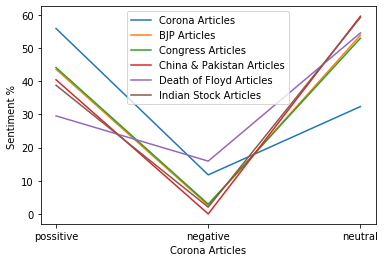

In [28]:
XC =['possitive', 'negative', 'neutral',]
YC = [Cor_pos, Cor_neg, Cor_neutral]
plt.plot(XC, YC, label = "Corona Articles")

XB =['possitive', 'negative', 'neutral']
YB = [BJP_pos, BJP_neg, BJP_neutral]
plt.plot(XB, YB, label = "BJP Articles")

XCON =['possitive', 'negative', 'neutral']
YCON = [Con_pos, Con_neg, Con_neutral]
plt.plot(XCON, YCON, label = "Congress Articles")

XCP =['possitive', 'negative', 'neutral']
YCP = [CP_pos, CP_neg, CP_neutral]
plt.plot(XCP, YCP, label = "China & Pakistan Articles")

XDF =['possitive', 'negative', 'neutral']
YDF = [DF_pos, DF_neg, DF_neutral]
plt.plot(XDF, YDF, label = "Death of Floyd Articles")

XIS =['possitive', 'negative', 'neutral']
YIS = [IS_pos, IS_neg, IS_neutral]
plt.plot(XIS, YIS, label = "Indian Stock Articles")

plt.legend()

plt.xlabel('Corona Articles')
plt.ylabel('Sentiment % ')



Text(0, 0.5, 'Mean of Sentiments')

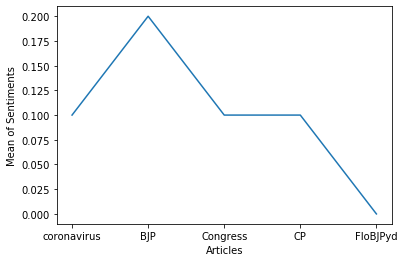

In [29]:
X=['coronavirus','BJP','Congress','CP','FloBJPyd','SM']
plt.plot(X, Y)
plt.xlabel('Articles')
plt.ylabel('Mean of Sentiments')

In [30]:
df1.sentiment.value_counts()


neutral     128
positive     85
negative     13
Name: sentiment, dtype: int64

In [31]:
neutral =131
negative=14
positive=102
per_pos=float(positive)*(100/247)
per_neg=float(negative)*(100/247)
per_neutral=float(neutral)*(100/247)

Text(0, 0.5, 'Percentage of the Sentiment')

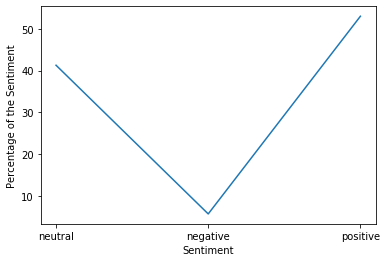

In [32]:
X=['neutral','negative','positive']
Y=[per_pos,per_neg,per_neutral]
plt.plot(X, Y)
plt.xlabel('Sentiment')
plt.ylabel('Percentage of the Sentiment')

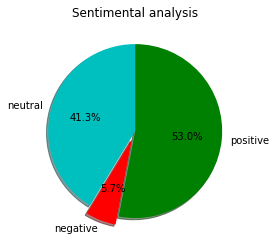

In [33]:
sentm_percentage = [per_pos,per_neg,per_neutral]
sentm = ['neutral','negative','positive']
cols = ['c','r','g']

plt.pie(sentm_percentage,
        labels=sentm,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0),
        autopct='%1.1f%%')

plt.title('Sentimental analysis')
plt.show()


### Analyse the Sentiment using vaderSentiment

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment = pd.DataFrame(columns=('Positive', 'Negative', 'Neutral', 'Compound'))
counter = 0
for article in df1['news_article']:
    article_compound = 0
    article_neg = 0
    article_pos = 0
    article_neu = 0
    counter = counter + 1
    try:
        sentences = sent_tokenize(article.decode('utf-8'))
        l = len(sentences)
    except:
        #print(counter)
        sentences = ['test', 'test2 jh']
        l = 1000000000000
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        article_compound = article_compound + vs['compound']
        article_neg = article_neg + vs['neg']
        article_pos = article_pos + vs['pos']
        article_neu = article_neu + vs['neu']
    article_sentiment =pd. DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Positive', 'Negative', 'Neutral', 'Compound'))
    sentiment = sentiment.append(article_sentiment, ignore_index = True)

In [35]:
sentiment.describe()

,Positive,Negative,Neutral,Compound
count,226.0,226.0,2.260000e+02,226.0
mean,0.0,0.0,2.000000e-12,0.0
std,0.0,0.0,4.452727e-27,0.0
min,0.0,0.0,2.000000e-12,0.0
25%,0.0,0.0,2.000000e-12,0.0
50%,0.0,0.0,2.000000e-12,0.0
75%,0.0,0.0,2.000000e-12,0.0
max,0.0,0.0,2.000000e-12,0.0


In [36]:
sentiment.isnull().any()

Positive    False
Negative    False
Neutral     False
Compound    False
dtype: bool

In [37]:
final_data = pd.concat([df1, sentiment], axis=1)
final_data.shape

(226, 10)

In [38]:
final_data.head(50)

,index,link,header,news_article,score,sentiment,Positive,Negative,Neutral,Compound
0,3,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,coronavirus search results,0.0,neutral,0.0,0.0,2.000000e-12,0.0
1,16,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,WWE talent tests positive for Covid-,0.2,positive,0.0,0.0,2.000000e-12,0.0
2,18,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"Jun ,",0.0,neutral,0.0,0.0,2.000000e-12,0.0
3,20,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,WWE have confirmed the news and stated that th...,0.5,positive,0.0,0.0,2.000000e-12,0.0
4,36,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,‘Improvement in recovery rate indicates more t...,0.5,positive,0.0,0.0,2.000000e-12,0.0
5,38,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"Jun ,",0.0,neutral,0.0,0.0,2.000000e-12,0.0
6,40,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"As many as , coronavirus patients were cured i...",0.2,positive,0.0,0.0,2.000000e-12,0.0
7,56,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,US donates first tranche of ventilators to India,0.2,positive,0.0,0.0,2.000000e-12,0.0
8,58,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,"Jun ,",0.0,neutral,0.0,0.0,2.000000e-12,0.0
9,60,https://www.hindustantimes.com/search?q=Corona...,coronavirus search results,read more,0.5,positive,0.0,0.0,2.000000e-12,0.0
